# Nearest Neighbor Algorithm

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../")     # import src library into jupyter environment

from src.neighbors import KNeighborsClassifier
from src.neighbors import KNeighborsRegressor

## A. Regression Case

In [2]:
X_train = [[0,1,2],[1,1,2],[2,1,2],[3,1,2]]
y_train = [0,0,1,1]

neigh = KNeighborsRegressor(n_neighbors=3, weights="uniform", distance_type="eucledian")
neigh.fit(X_train,y_train)

X_input = np.array([[2.2,1,2],
           [5,1,2],
           [10,1,2]])

print("Regression Result")
for data_result in zip(X_input, neigh.predict(X_input)):
    print(f"Data Input : {data_result[0]} | Regression Output {data_result[1]:.4f}")

Regression Result
Data Input : [2.2 1.  2. ] | Regression Output 0.6667
Data Input : [5. 1. 2.] | Regression Output 0.6667
Data Input : [10.  1.  2.] | Regression Output 0.6667


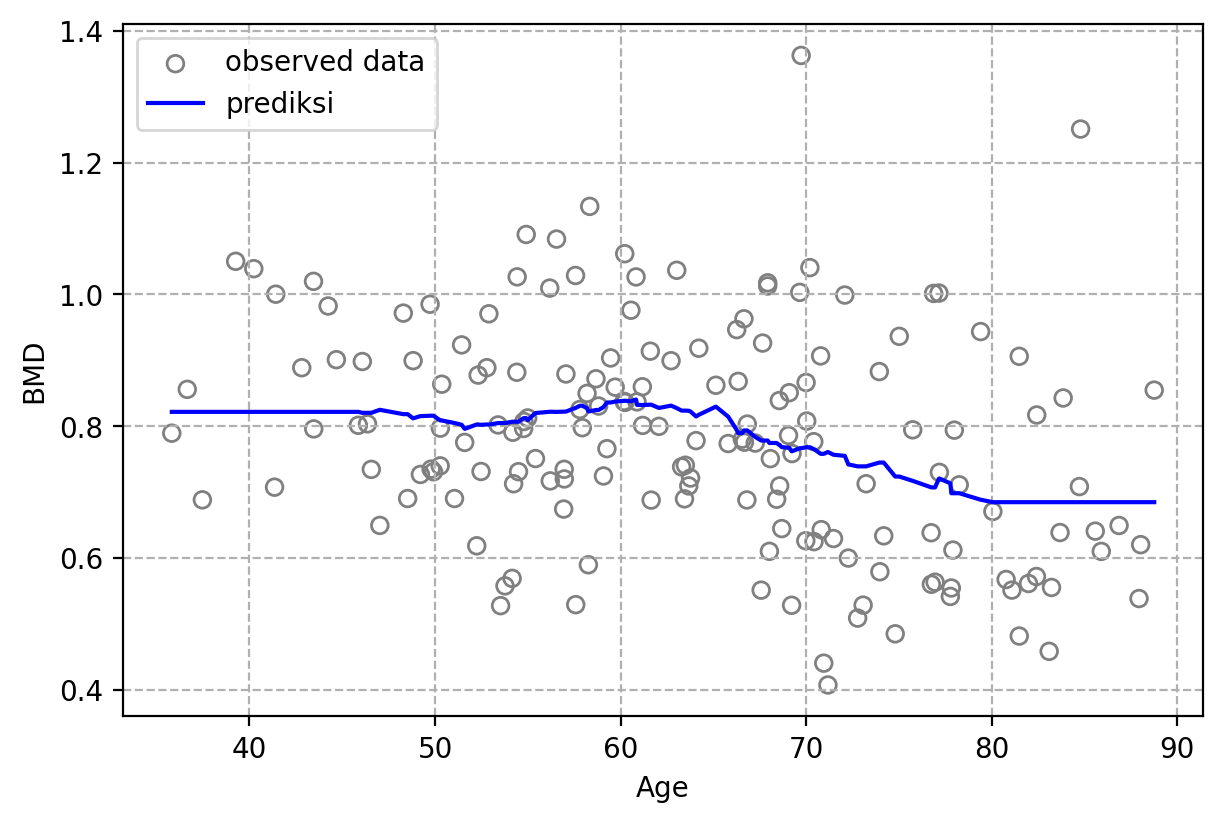

In [3]:
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df['age']
y_train = df['bmd']
X_test = X_train.copy() + 1e-6


# Create prediction
neigh = KNeighborsRegressor(n_neighbors=50)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test)
X_test_sorted = X_test[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted, y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

## B. Classification Case

In [4]:
X_train = [[0,1],[1,1],[2,1],[3,1]]
y_train = [0,0,1,1]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

X_input = np.array([[1.1,1],[2,1],[3,1],[1.4,1]])

print("Classification Result")
for data_result in zip(X_input, neigh.predict(X_input)):
    print(f"Data Input : {data_result[0]} | Classification Output {data_result[1]}")
print("")
print("Probability Result")
for data_result in zip(X_input, neigh.predict_proba(X_input)):
    print(f"Data Input : {data_result[0]} | Probability Output for class {neigh.classes} : {data_result[1]}")

Classification Result
Data Input : [1.1 1. ] | Classification Output 0
Data Input : [2. 1.] | Classification Output 1
Data Input : [3. 1.] | Classification Output 1
Data Input : [1.4 1. ] | Classification Output 0

Probability Result
Data Input : [1.1 1. ] | Probability Output for class [0 1] : [0.66666667 0.33333333]
Data Input : [2. 1.] | Probability Output for class [0 1] : [0.33333333 0.66666667]
Data Input : [3. 1.] | Probability Output for class [0 1] : [0.33333333 0.66666667]
Data Input : [1.4 1. ] | Probability Output for class [0 1] : [0.66666667 0.33333333]
